# Creator:
### Najeeb Zaidi
### Github: https://github.com/snajeebz
### zaidi.nh@gmail.com
### Contributors: 
1. https://github.com/snajeebz
2. https://github.com/qinajeeb
## Dataset Source: 
1. https://www.kaggle.com/competitions/titanic

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
#Disable warning
import warnings
warnings.filterwarnings("ignore")

print(f"Tensor Flow Version: {tf.__version__}")

Tensor Flow Version: 2.10.0


# Importing the Dataset

In [17]:
try:   #for Local Environment
    train_df = pd.read_csv("Dataset/train.csv")
    serving_df = pd.read_csv("Dataset/test.csv")
except: #for Kaggle Environment
    train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
    serving_df = pd.read_csv("/kaggle/input/titanic/test.csv")

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Strategy:
1. Data Preparation and Scikit Learn Algo implementation
2. Model and Hyper Parameter Tuning
3. Tensorflow Models implementation
4. Tensorflow Models and Hyper-Parameters Tuning

## 1. Data Preparation and Scikit Learn Algo implementation

### Steps:
1. Dataset EDA
2. Data Wrangling
3. Test Train Dataset preparation for scikit-Learn
4. Scikit Learn ML Model Plus Hyper Parameters Tuning
5. Submission of the Best Results.

## 1. Dataset EDA

In [18]:
print(train_df.describe());

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [19]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Observations:
1. Cabin has got 687 nulls which is more than 75% of the rows. So I guess it will be better to not use cabin as a feature for our model.
2. Age has around 20% nulls. So we will try the best to fill them up.

## Let's dig deep into Age

In [20]:
print("Group by Parch: \n",train_df['Age'].isna().groupby(train_df['Parch']).value_counts())
print("Group by Sex: \n",train_df['Age'].isna().groupby(train_df['Sex']).value_counts())
print("Group by SibSp: \n",train_df['Age'].isna().groupby(train_df['SibSp']).value_counts())
print("Group by Pclass: \n",train_df['Age'].isna().groupby(train_df['Pclass']).value_counts())



Group by Parch: 
 Parch  Age  
0      False    521
       True     157
1      False    110
       True       8
2      False     68
       True      12
3      False      5
4      False      4
5      False      5
6      False      1
Name: count, dtype: int64
Group by Sex: 
 Sex     Age  
female  False    261
        True      53
male    False    453
        True     124
Name: count, dtype: int64
Group by SibSp: 
 SibSp  Age  
0      False    471
       True     137
1      False    183
       True      26
2      False     25
       True       3
3      False     12
       True       4
4      False     18
5      False      5
8      True       7
Name: count, dtype: int64
Group by Pclass: 
 Pclass  Age  
1       False    186
        True      30
2       False    173
        True      11
3       False    355
        True     136
Name: count, dtype: int64


## Observation
1. Out the Nans of age 16% are female.
2. Out the Nans of age 21% are male.

#### Let's separate the columns to impute the nulls.

In [21]:
df = train_df[['Survived','Age','SibSp', 'Parch', 'Fare','PassengerId', 'Sex','Pclass']]
df=pd.get_dummies(df, columns=['Sex'])
df.head()


,Survived,Age,SibSp,Parch,Fare,PassengerId,Pclass,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,1,3,False,True
1,1,38.0,1,0,71.2833,2,1,True,False
2,1,26.0,0,0,7.9250,3,3,True,False
3,1,35.0,1,0,53.1000,4,1,True,False
4,0,35.0,0,0,8.0500,5,3,False,True


#### Separating Nans from the df

In [22]:
df.isnull().sum()

Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
PassengerId      0
Pclass           0
Sex_female       0
Sex_male         0
dtype: int64

In [23]:
df_nan=df[df['Age'].isnull()]
df.dropna(inplace=True)
df.isnull().sum()


Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
PassengerId    0
Pclass         0
Sex_female     0
Sex_male       0
dtype: int64

In [24]:
print('Parch',df_nan['Parch'].value_counts())
print('SibSp',df_nan['SibSp'].value_counts())


Parch Parch
0    157
2     12
1      8
Name: count, dtype: int64
SibSp SibSp
0    137
1     26
8      7
3      4
2      3
Name: count, dtype: int64


In [27]:
figure= px.imshow(df.corr(), text_auto=True, width=1200, height=1200)
figure.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Upper Outliers: Series([], Name: Age, dtype: float64)
Lower Outliers: Series([], Name: Age, dtype: float64)


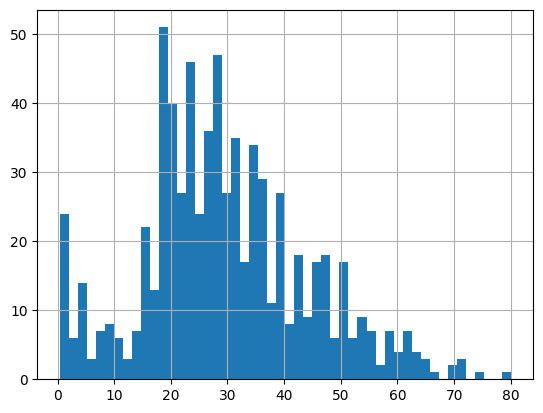

In [28]:
df['Age'].hist(bins=50)
print('Upper Outliers:',df['Age'][df['Age']>80])
print('Lower Outliers:',df['Age'][df['Age']<0])

Some noticeable correlation between Sibsp, Parch with Age. I guess if we apply Machine Learning Algorithm, we can get some fruitful model to fill the Nans of the age.

### Let's try Linear Regression to see what we can come up with.

In [29]:
df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'PassengerId', 'Pclass',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

X=df[['Survived', 'SibSp', 'Parch','Fare','Sex_female', 'Sex_male','Pclass']]
y=df[['Age']]
X_train,X_test,y_train, y_test=train_test_split(X,y,train_size=0.9, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.get_params())
param_grid={'fit_intercept':[False],
            'copy_X':[True],
            'n_jobs': [0],
            'positive':[False]
            }
grid_search=GridSearchCV(model, param_grid,cv=50, scoring='r2')
grid_search.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Best Parameters: ", grid_search.best_params_)
print("Score:", grid_search.score(X_test,y_test))
print("Normal Model:",model.score(X_test,y_test))


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best Parameters:  {'copy_X': True, 'fit_intercept': False, 'n_jobs': 0, 'positive': False}
Score: 0.2010601074050068
Normal Model: 0.20106010740500957


In [31]:
results=X_test
results=results.join(y_test)
results['Predicted Age']=y_pred

results
results['Parch'].describe()

count    72.000000
mean      0.388889
std       0.722974
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000
Name: Parch, dtype: float64

Group by Parch: 
 Parch
0      5.519831
1    131.357479
2     22.819462
3    -56.334699
Name: percent error, dtype: float64 [0 1 3 2]
Group by Mele: 
 Sex_male
False     7.186424
True     37.964618
Name: percent error, dtype: float64
Group by Female: 
 Sex_female
False    37.964618
True      7.186424
Name: percent error, dtype: float64
Group by Pclass: 
 Pclass
1    10.003072
2    44.157732
3    25.811815
Name: percent error, dtype: float64
Values with error more than 10%: 0


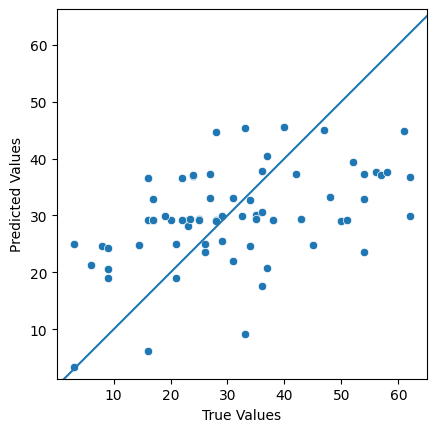

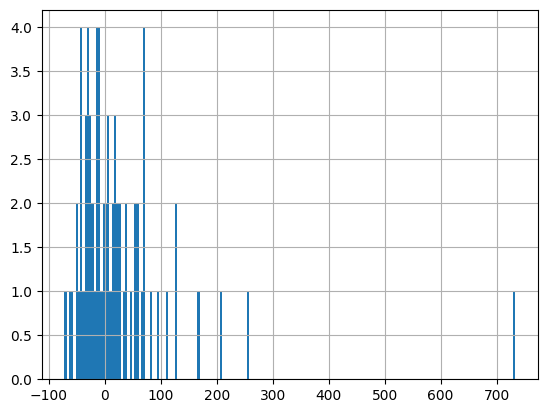

In [32]:
def plotresults(results):
    results['error']=results['Predicted Age']-results['Age']

    results['percent error']=100*results['error']/results['Age']
        
    plt.figure(1)
    sns.scatterplot(data=results, x='Age', y='Predicted Age')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100,100],[-100,100])
    plt.figure(2)
    results['percent error'].hist(bins=200)
    #plt.axis('equal')
    #plt.axis('square')
 #   plt.ylim([0,1])
plotresults(results)
results.describe()
print("Group by Parch: \n",results['percent error'].groupby(results['Parch']).mean(), results['Parch'].unique())
print("Group by Mele: \n",results['percent error'].groupby(results['Sex_male']).mean())
print("Group by Female: \n",results['percent error'].groupby(results['Sex_female']).mean())
print("Group by Pclass: \n",results['percent error'].groupby(results['Pclass']).mean())
print("Values with error more than 10%:", results['percent error'][(results['percent error']>10) & (results['percent error']< -10)].count())



In [33]:
print("Values with error more than 10%:", results['percent error'][(results['percent error'] > 10) | (results['percent error']< -10)].count())
results['percent error'].count()

Values with error more than 10%: 60


72

## Observations:
- Around 20% accurate predictions with MAE around 25%.
- Apart of rows, where Parch=3 and SibSp=3 the Mean Absolute Error is less than 10%. in df_nan this equates to less than 5 out of 177 values.
- It will be better to tryout CNN on this as well. Probably we can get better accuracy than this. 

In [82]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1281,activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
    tf.keras.layers.Dense(1281,activation=tf.nn.relu, use_bias=True),
    tf.keras.layers.Dense(1281,activation=tf.nn.relu, use_bias=False),
    tf.keras.layers.Dense(512,activation=tf.nn.relu, use_bias=False),
    tf.keras.layers.Dense(256,activation=tf.nn.relu, use_bias=True),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])
#model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001) , loss='mse', metrics=['mae','mse'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001) , loss='mae', metrics=['mae','mse','accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 1281)              10248     
                                                                 
 dense_122 (Dense)           (None, 1281)              1642242   
                                                                 
 dense_123 (Dense)           (None, 1281)              1640961   
                                                                 
 dense_124 (Dense)           (None, 512)               655872    
                                                                 
 dense_125 (Dense)           (None, 256)               131328    
                                                                 
 dense_126 (Dense)           (None, 256)               65792     
                                                                 
 dense_127 (Dense)           (None, 128)             

## Writing function to evaluate the DL Model

In [78]:
def plot_history(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    hist1=[]
#hist1=hist.tail(550)
    hist1=hist
#sns.lineplot(data=histsamp, y='val_mse', x='epoch')

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist1['epoch'],hist1['mae'], label='Train Error')
    plt.plot(hist1['epoch'], hist1['val_mae'], label='Val_Error')
    plt.legend()
#plt.ylim([0, 0.2])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist1['epoch'],hist1['mse'], label='Train Error')
    plt.plot(hist1['epoch'], hist1['val_mse'], label='Val_Error')
    plt.legend()

Epoch 1/15000
2/2 [==============================] - 1s 418ms/step - loss: 26.2205 - mae: 26.2205 - mse: 813.8191 - accuracy: 0.0000e+00 - val_loss: 23.1198 - val_mae: 23.1198 - val_mse: 682.2439 - val_accuracy: 0.1250
Epoch 2/15000
2/2 [==============================] - 0s 68ms/step - loss: 25.4249 - mae: 25.4249 - mse: 778.5129 - accuracy: 0.0000e+00 - val_loss: 22.8046 - val_mae: 22.8046 - val_mse: 661.9407 - val_accuracy: 0.1250
Epoch 3/15000
2/2 [==============================] - 0s 78ms/step - loss: 24.8843 - mae: 24.8843 - mse: 753.3463 - accuracy: 0.0000e+00 - val_loss: 22.6125 - val_mae: 22.6125 - val_mse: 645.5125 - val_accuracy: 0.1250
Epoch 4/15000
2/2 [==============================] - 0s 68ms/step - loss: 24.5424 - mae: 24.5424 - mse: 735.9231 - accuracy: 0.0000e+00 - val_loss: 22.4214 - val_mae: 22.4214 - val_mse: 629.9589 - val_accuracy: 0.1250
Epoch 5/15000
2/2 [==============================] - 0s 61ms/step - loss: 24.4184 - mae: 24.4184 - mse: 723.6221 - accuracy: 0.

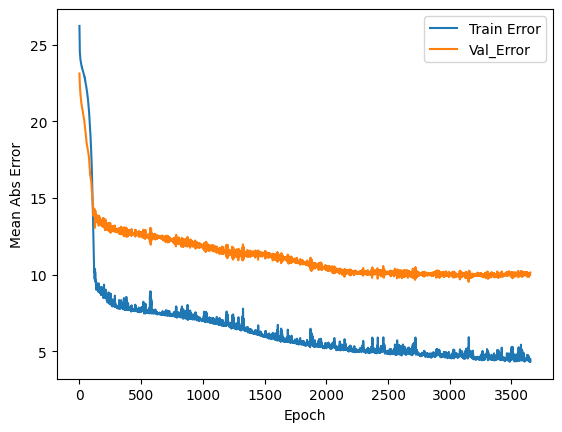

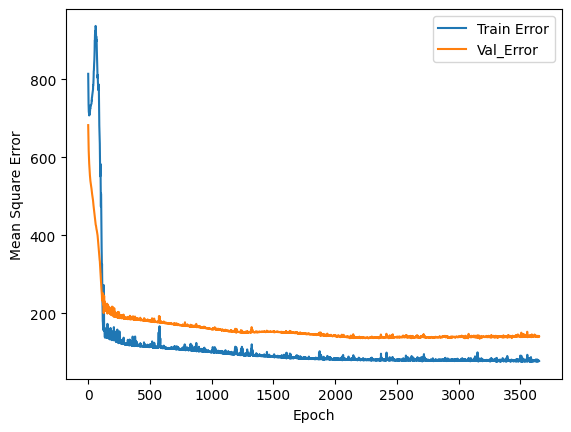

In [83]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_mae',
                                            min_delta=0,
                                            patience=500,
                                             verbose=0, mode='min')
X_train = pd.DataFrame(X_train).astype('int32')
X_test = pd.DataFrame(X_test).astype('float32')
history=model.fit(X_test,y_train, epochs=15000, validation_split=0.1, callbacks=[early_stop])
#evaluate the model
print('Test accuracy:', model.evaluate(X_test,y_test))
plot_history(history)


In [84]:

print('Test accuracy:', model.evaluate(X_test,y_test))
y_pred=model.predict(X_test)



3/3 [==============================] - 0s 5ms/step - loss: 15.4386 - mae: 15.4386 - mse: 375.5316 - accuracy: 0.0000e+00
Test accuracy: [15.438566207885742, 15.438566207885742, 375.5315856933594, 0.0]
3/3 [==============================] - 0s 7ms/step


,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass,Age,Predicted Age,error,percent error
149,0.0,0.0,0.0,13.000000,0.0,1.0,2.0,42.0,30.133205,-11.866795,-28.254273
407,1.0,1.0,1.0,18.750000,0.0,1.0,2.0,3.0,19.841858,16.841858,561.395264
53,1.0,1.0,0.0,26.000000,1.0,0.0,2.0,29.0,42.912090,13.912090,47.972725
369,1.0,0.0,0.0,69.300003,1.0,0.0,1.0,24.0,16.691263,-7.308737,-30.453070
818,0.0,0.0,0.0,6.450000,0.0,1.0,3.0,43.0,19.138254,-23.861746,-55.492432
...,...,...,...,...,...,...,...,...,...,...,...
356,1.0,0.0,1.0,55.000000,1.0,0.0,1.0,22.0,18.504719,-3.495281,-15.887642
744,1.0,0.0,0.0,7.925000,0.0,1.0,3.0,31.0,20.104994,-10.895006,-35.145181
872,0.0,0.0,0.0,5.000000,0.0,1.0,1.0,33.0,21.497833,-11.502167,-34.855051
500,0.0,0.0,0.0,8.662500,0.0,1.0,3.0,17.0,22.355461,5.355461,31.502712


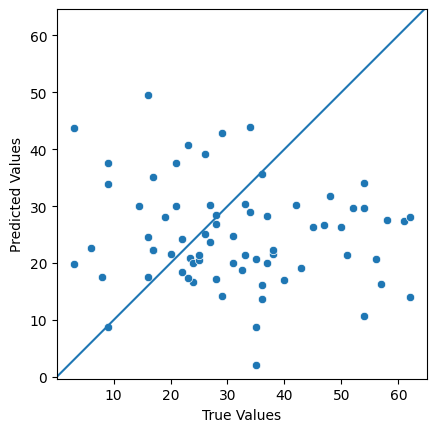

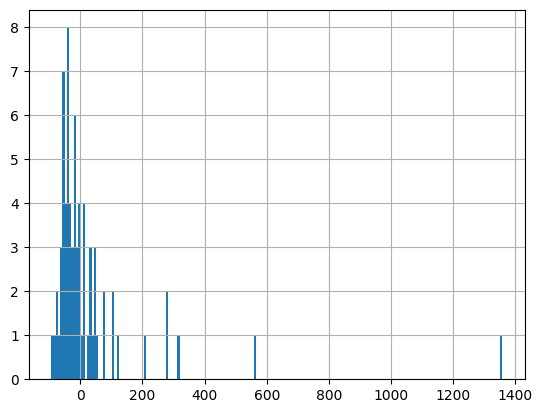

In [85]:
results1=X_test
results1=results1.join(y_test)
results1['Predicted Age']=y_pred
results1['Predicted Age'].unique()
plotresults(results1)
results1.head(72)
